<a href="https://colab.research.google.com/github/thefr33radical/codeblue/blob/master/temp/Assignment_predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 1a

def exponential(arg1,arg2):
  return arg1**arg2

print(exponential(2,10))

1024


Index(['sx', 'rk', 'yr', 'dg', 'yd', 'sl'], dtype='object')
          sx        rk        yr        dg        yd        sl
sx  1.000000  0.230411  0.379404  0.077112  0.088288  0.252782
rk  0.230411  1.000000  0.507980  0.014564  0.695724  0.867488
yr  0.379404  0.507980  1.000000  0.143377  0.638776  0.700669
dg  0.077112  0.014564  0.143377  1.000000  0.482836  0.069726
yd  0.088288  0.695724  0.638776  0.482836  1.000000  0.674854
sl  0.252782  0.867488  0.700669  0.069726  0.674854  1.000000
Coefficients: 
 [-1237.70506105  5718.81936389   501.68024961  1696.47297512
  -149.84512752]
Mean squared error: 1715.03
Variance score: 0.89


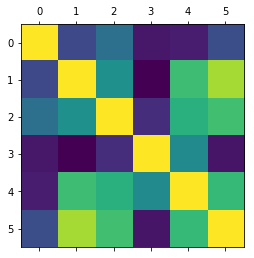

In [0]:
# 1b

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt


data = pd.read_csv( 'http://data.princeton.edu/wws509/datasets/salary.dat',
            header='infer',sep="\s+")
print(data.columns)
le = preprocessing.LabelEncoder()
#data.drop(["rk","dg","sx"],inplace=True,axis=1)
data["rk"]=le.fit_transform(data["rk"])
data["dg"]=le.fit_transform(data["dg"])
data["sx"]=le.fit_transform(data["sx"])


corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr)
print(corr)

X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.2,random_state=123)

model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, y_predict)))

print('Variance score: %.2f' % r2_score(y_test, y_predict))



Index(['x1', 'x2', 'y', 'X1plusX2'], dtype='object')
                x1        x2         y  X1plusX2
x1        1.000000  0.013652  0.346427  0.558252
x2        0.013652  1.000000  0.526834  0.837215
y         0.346427  0.526834  1.000000  0.626609
X1plusX2  0.558252  0.837215  0.626609  1.000000
[1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1
 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1]
0.7
[[-0.00857959  0.03371248  0.02513288]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


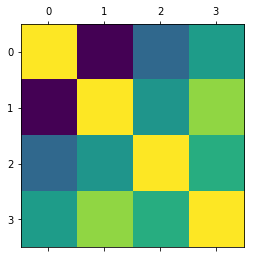

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

import requests
import io

response = requests.get("http://ucanalytics.com/blogs/wp-content/uploads/2017/09/Data-L-Reg-Gradient-Descent.csv")
file_object = io.StringIO(response.content.decode('utf-8'))
data = pd.read_csv(file_object,header="infer",sep=",")
print(data.columns)

corr=data.corr()
plt.matshow(corr)
print(corr)

x= pd.concat([data["x1"],data["x2"],data["X1plusX2"]],axis=1)
y=data["y"]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5689)

model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(y_predict)
score = model.score(X_test, y_test)
print(score)
print(model.coef_)